# **AVIATION DATASET DATA ANALYSIS PROJECT**

## **1. Objectives**<hr>

#### **Business Question**<br>
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Objective 1<br>
Which aircraft is the safest?

### Objective 2<br>
Identify the safest and most dangerous countries & locations to fly over

### Objective 3<br>
The most common type of accidents so as to invest in advance in prevetive measures

<br>

## **2. Data Understanding**<hr>

In this section we try to understand the data itself. First we have to read the source notes on what is in the columns, the categories in categorical and what missing data means. We look at its shape and also at the descriptive statistics of the data.

**Importing libraries and data**

In [73]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Importing the data
acc_df = pd.read_csv("data/aviation-accident-data-2023-05-16.csv")

Lets look at the top and bottom 10 rows of the dataset

In [75]:
acc_df.head(10)

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
6,date unk.,Antonov An-2,CCCP-N574,"GUSMP, Directorate of Polar Aviation",NaN,unknown,Russia,A1,unknown
7,date unk.,Antonov An-2,CCCP-01216,Aeroflot,0,Chita region,Russia,A2,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
9,date unk.,Antonov An-26,01 red,Soviet AF,0,Orenburg Air Base,Russia,O1,unknown


In [76]:
acc_df.tail(10)

,date,type,registration,operator,fatalities,location,country,cat,year
23957,21-APR-2023,Ilyushin Il-76TD,ST-BDN,Badr Airlines,0,Khartoum Interna...,Sudan,O1,2023
23958,21-APR-2023,Beech 200 Super King Air,LV-WPM,Flytec SA,0,Salta-MartÃ­n Mi...,Argentina,A2,2023
23959,26-APR-2023,Boeing 777-233LR,C-FIUF,Air Canada,0,Sydney-Kingsford...,Australia,A2,2023
23960,09-MAY-2023,Cessna 208 Caravan 675,PK-HVG,Dimonim Air,0,Yabi Airstrip,Indonesia,A2,2023
23961,10-MAY-2023,Learjet 36A,N56PA,Phoenix Air,3,near San Clemente Isl...,USA,A1,2023
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023
23966,15-MAY-2023,Learjet 35A,D-CGFQ,GFD,2,Hohn Air Base,Germany,A1,2023


At a first glance we get a rough Idea about the format of data in cells. We can also see what null valuesare denoted as especialy in the non-number columns, where they are denoted as unknown

In [77]:
# Getting the shape of data
acc_df.shape

(23967, 9)

The dataframe has 23967 rows and 9 columns. Any column with less than 23967 entries has null values

In [78]:
# Lets look at the column infomation
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [79]:
acc_df["fatalities"].describe()

count     20029
unique      369
top           0
freq      10713
Name: fatalities, dtype: object

We can see all the columns are of object datatype. Fatalities column off the rip needs to be converted to a number. Registration, operator, fatalities and location columns all have null values that have to be dealt with.

<br>

**Descriptive Statistics of the data**

In this section we get the descriptive statistics of the columns

In [80]:
acc_df.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


Here we can see the descriptive statistics of the non numerical data. We can infer:

    - A1 is the most common accident.
    - 10th May 1940 had alot of accidents
    - Most accidents occured in the year 1944
    - Most accidents had no fatalities.
    - Most accidents occured in the US.
    - The countries might have spelling errors since there are 232 unique countries compared to the 195-200 countries in the world.

In [81]:
# Converting the fatalities  column to int datatype to get correct descriptive statistics
acc_df["fatalities"] = pd.to_numeric(acc_df["fatalities"], errors="coerce") 
#Converts string values to int and if the srting is in a non-int format it isrplaced with NaN

In [82]:
acc_df["fatalities"].describe()

count    19676.000000
mean         6.135851
std         18.686195
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        520.000000
Name: fatalities, dtype: float64

We can see most accidents were non fatal. Also mean is not a good measure of central tendency here since the data is left-skewed.

<br>

## **3. Data Cleaning**<hr>
In this section we clean the data i.e try to remove the percieved errors in data

First let's handle missing values

In [83]:
# Calling .info on the dataframe again to see where the missing values lie
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          23967 non-null  object 
 1   type          23967 non-null  object 
 2   registration  22419 non-null  object 
 3   operator      23963 non-null  object 
 4   fatalities    19676 non-null  float64
 5   location      23019 non-null  object 
 6   country       23967 non-null  object 
 7   cat           23967 non-null  object 
 8   year          23967 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


Registration won't be important for our endeavour so it can. We will need to handle the facilities data. We will also drop the type of aircrafts that are unknown. 

In [84]:
#Lets take a look at the type first
acc_df["type"].value_counts().to_csv("./output/types.csv")

In [85]:
acc_df[acc_df["type"] == "unknown"]

,date,type,registration,operator,fatalities,location,country,cat,year
5446,20-SEP-1946,unknown,NaN,CNAC,31.0,"near Xichang, Sichuan...",China,A1,1946
5655,25-APR-1947,unknown,..-141,CNAC,NaN,Shanghei-Lungwha...,China,A1,1947
6178,30-JAN-1949,unknown,NaN,CNAC,0.0,Tainan,Taiwan,H2,1949
6537,11-AUG-1950,unknown,NaN,CSA,0.0,near Aichach,Germany,H2,1950
7036,18-APR-1952,unknown,NaN,JAT,0.0,Graz-Thalerhof A...,Austria,H2,1952
8670,08-JUL-1959,unknown,NaN,JAT,0.0,Bari-Palese Airp...,Italy,H2,1959
8904,21-AUG-1960,unknown,NaN,Aeroflot,1.0,NaN,Russia,H2,1960
8972,08-DEC-1960,unknown,NaN,Cubana,1.0,near Cienfuegos,Cuba,H2,1960
10170,31-DEC-1965,unknown,NaN,Aeroflot,1.0,NaN,Unknown country,H2,1965
10721,19-FEB-1968,unknown,NaN,Aeroflot,2.0,Baghdad,Iraq,A1,1968


There are only 28 unknown types, so we will drop them since te type of aircraft is very important to us

In [86]:

acc_df = acc_df[acc_df["type"] != "unknown"]

In [87]:
acc_df[acc_df["type"] == "unknown"]

,date,type,registration,operator,fatalities,location,country,cat,year


Now let's deal with the country and location columns

In [88]:
#Lets calculate the percentage of rows missing location data
(23019/23967) * 100
# We can see we have 4% missing values

96.04456127174865

In [89]:
acc_df[acc_df["location"].isnull()]

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0.0,NaN,Russia,A1,unknown
...,...,...,...,...,...,...,...,...,...
19791,15-APR-2003,Vickers 836 Viscount,9Q-CGL,Trans Intair,0.0,NaN,D.R. Congo,A1,2003
19806,10-MAY-2003,Antonov An-2R,UK-68038,Uzbekistan Airways,NaN,NaN,Unknown country,A2,2003
20002,02-MAY-2004,Yakovlev Yak-40,YV-1070CP,CIACA Airlines,NaN,NaN,Guatemala,A1,2004
20077,11-SEP-2004,Lockheed C-130H Hercules,NaN,USAF,0.0,NaN,Iraq,C2,2004


In [90]:
#lets drop rows where  the location is NaN
acc_df = acc_df.dropna(subset=["location"])

In [91]:
acc_df[acc_df["location"].isnull()] # Confirm that they are dropped

,date,type,registration,operator,fatalities,location,country,cat,year


Null locations have been dropped since they are only 4% of the dataset. Let's now deal with the country column. We can see that country  has no null values. It however has unknown values. If they are not that many we can remove them since filling them in with the mode In my view will skew the data

In [92]:
acc_df["country"].value_counts() 

USA          4371
Russia       1366
U.K.          834
Canada        825
India         666
             ... 
Tuvalu          1
Mauritius       1
Kosovo          1
Macau           1
Eswatini        1
Name: country, Length: 232, dtype: int64

In [93]:
#Save this to a temporary csv to have a look at the data
acc_df[acc_df["country"] == "Unknown country"].to_csv("./output/unknown_countries.csv")

When we look at the temporary csv it has alot of missing data in the location, fatalities and countries columns. We can remove them safelt in my view.

In [94]:
acc_df = acc_df[acc_df["country"] != "Unknown country"]

In [95]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22701 entries, 3 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          22701 non-null  object 
 1   type          22701 non-null  object 
 2   registration  21283 non-null  object 
 3   operator      22697 non-null  object 
 4   fatalities    19449 non-null  float64
 5   location      22701 non-null  object 
 6   country       22701 non-null  object 
 7   cat           22701 non-null  object 
 8   year          22701 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


In [96]:
acc_df[acc_df["location"]=="unknown"].count()

date            65
type            65
registration    60
operator        65
fatalities      28
location        65
country         65
cat             65
year            65
dtype: int64

In [97]:
#lets drop the location 

In [98]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22701 entries, 3 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          22701 non-null  object 
 1   type          22701 non-null  object 
 2   registration  21283 non-null  object 
 3   operator      22697 non-null  object 
 4   fatalities    19449 non-null  float64
 5   location      22701 non-null  object 
 6   country       22701 non-null  object 
 7   cat           22701 non-null  object 
 8   year          22701 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


Now lets deal with the fatalities column

In [105]:
# The number of columns with NaN fatalities
len(acc_df[acc_df["fatalities"].isna()])

0

In [100]:
# Let's look at the descriptive statistics of the fatalities column
acc_df["fatalities"].describe()

count    19449.000000
mean         6.182786
std         18.781809
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        520.000000
Name: fatalities, dtype: float64

At a glance we can see the mean is at the 3rd quantile of the dataset, so it is not a good measure of central tendency in this case. 

In [101]:
# Let's fill the NaN fatalities with the median value
fatalities_median = acc_df["fatalities"].median()
fatalities_median

0.0

In [102]:
acc_df["fatalities"].fillna(fatalities_median, inplace=True)

In [103]:
acc_df[acc_df["fatalities"].isna()]

,date,type,registration,operator,fatalities,location,country,cat,year


<AxesSubplot:xlabel='fatalities'>

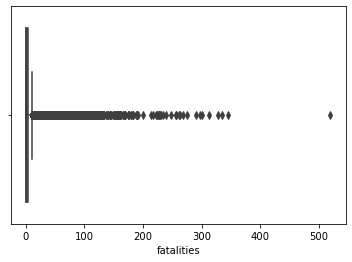

In [108]:
# Looking at the boxplot of the fatalities column
sns.boxplot(x=acc_df["fatalities"])

**Now all the relevant columns are cleaned. Let's visualize and analyze the data now to meet our objectives**

In [109]:
acc_df.to_csv("./data/accidents_cleaned.csv")